# Praktikum 5
Klasifikasi Citra Siang dan Malam

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

### Langkah 0 - Import Library


In [29]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd


# Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. 
# Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

# Image directories
train_dir = "data/images/images/training/"
test_dir = "data/images/images/test/"

### Langkah 1 - Load Data dan Visualisasikan

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [30]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        print(f"Checking folder: {dir}")  # Debugging line
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            print(f"Found image: {file}")  # Debugging line
            img = mpimg.imread(file)

            if img is not None:
                img_list.append((img, label))
    
    return img_list


Load gambar training

In [31]:
# Load training data
train_img = load_dataset(train_dir)


Checking folder: data\images\images\training\day
Found image: data\images\images\training\day\20151101_142050.jpg
Found image: data\images\images\training\day\20151101_145049.jpg
Found image: data\images\images\training\day\20151101_145511.jpg
Found image: data\images\images\training\day\20151101_155059.jpg
Found image: data\images\images\training\day\20151101_155521.jpg
Found image: data\images\images\training\day\20151101_162053.jpg
Found image: data\images\images\training\day\20151101_162527.jpg
Found image: data\images\images\training\day\20151101_165511.jpg
Found image: data\images\images\training\day\20151101_172044.jpg
Found image: data\images\images\training\day\20151101_172507.jpg
Found image: data\images\images\training\day\20151101_175046.jpg
Found image: data\images\images\training\day\20151101_175522.jpg
Found image: data\images\images\training\day\20151101_182052.jpg
Found image: data\images\images\training\day\20151101_182513.jpg
Found image: data\images\images\training\

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [32]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 37,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

Cek ukuran gambar secara acak

In [33]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 208
(469, 640, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [34]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

Shape	: (700, 1280, 3)
Label	: data\images\images\training\night


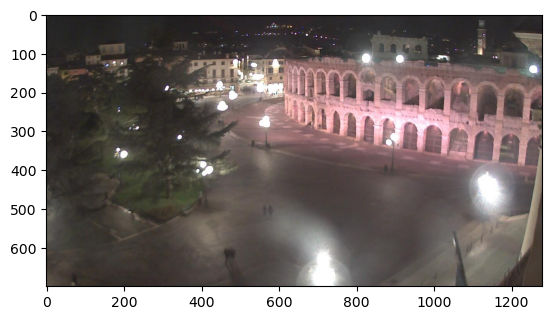

In [35]:
random_img_viz(train_img)

### Langkah 3 - Pra Pengolahan Data
Langkah 3 - Pra Pengolahan Data

In [36]:
#Fungsi untuk standarkan ukuran gambar
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

encoding label 

In [37]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

Fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [38]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

pra pengolahan data pada data training.

In [39]:
train_std_img_list = preprocess(train_img)

pengecekan ukuran gambar secara acak

In [40]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 170
(600, 1100, 3)


inspeksi visual dengan fungsi random_img_viz

Shape	: (600, 1100, 3)
Label	: 0


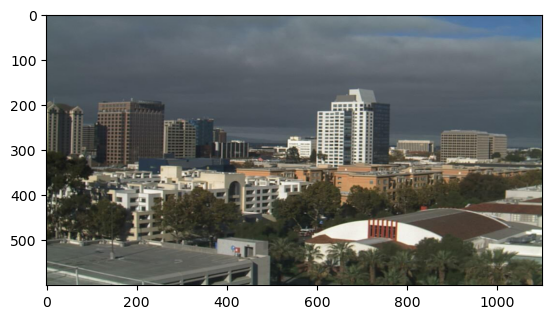

In [41]:
random_img_viz(train_std_img_list)

### Langkah 4 - Ekstraksi Fitur

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [42]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 1
Avg Brighness: 192.9548


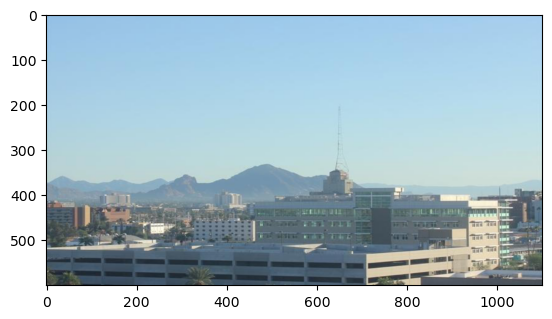

In [43]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

### Langkah 5 - Klasifikasi dengan Metode Threshold
Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

In [44]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1
    
    return pred

pengecekan prediksi secara acak pada data training

Image 109
Actual label: 0
Predicted label: 1


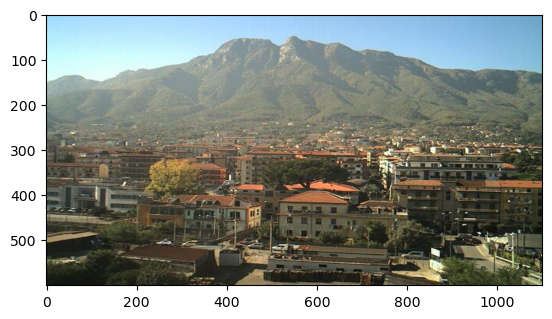

In [45]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### Langkah 6 - Evaluasi (Manual)
Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

In [46]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

evaluasi pada data training dengan nilai ambang batas 120

In [47]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.6583


evaluasi pada data testing

In [48]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Checking folder: data\images\images\test\day
Found image: data\images\images\test\day\20151101_152050.jpg
Found image: data\images\images\test\day\20151101_152512.jpg
Found image: data\images\images\test\day\20151101_165048.jpg
Found image: data\images\images\test\day\20151101_222053.jpg
Found image: data\images\images\test\day\20151101_225048.jpg
Found image: data\images\images\test\day\20151101_232057.jpg
Found image: data\images\images\test\day\20151101_235039.jpg
Found image: data\images\images\test\day\20151102_002051.jpg
Found image: data\images\images\test\day\20151102_005050.jpg
Found image: data\images\images\test\day\20151102_055603.jpg
Found image: data\images\images\test\day\20151102_060941.jpg
Found image: data\images\images\test\day\20151102_061450.jpg
Found image: data\images\images\test\day\20151102_062005.jpg
Found image: data\images\images\test\day\20151102_062454.jpg
Found image: data\images\images\test\day\20151102_071409.jpg
Found image: data\images\images\test\day

### Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM
Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

### Langkah 4 alternatif - Membuat Feature Vectors
Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

In [49]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)
    
    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [51]:
#Cek hasilnya pada data training,
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()


Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.129871,0.0
1,192.954773,0.0
2,132.141432,0.0
3,199.784797,0.0
4,109.964702,0.0


### Langkah 5 alternatif
Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [1]:
# import required library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:, 0].values.reshape(-1, 1)
y_train = train_avg_img.iloc[:, 1]

# Check unique labels in y_train
print("Unique labels in y_train:", y_train.unique())

# Cek jumlah setiap label
print("Label counts:")
print(y_train.value_counts())

# Proceed to create and fit the model
model = SVC()
model.fit(X_train, y_train)


NameError: name 'train_avg_img' is not defined